In [1]:
import pandas as pd
import os
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = os.getcwd()

In [17]:
srgnn = pd.read_csv(path + os.sep + "srgnn/predictions/predictions_yoochoose1_64.txt", sep=';', header=None, names=['predictions', 'actual'])
light = pd.read_csv(path + os.sep + "srgnn_light/predictions/predictions_yoochoose1_64.txt", sep=';', header=None, names=['predictions', 'actual'])

In [18]:
items = []
for i in srgnn.predictions:
    items.append(i.split(','))

In [19]:
all_items_srgnn = list(chain(*items))
all_items_srgnn = pd.DataFrame (all_items_srgnn, columns = ['ItemId'])
all_items_srgnn = all_items_srgnn.sort_values(by='ItemId', ascending=False)

In [20]:
items = []
for i in light.predictions:
    items.append(i.split(','))

In [21]:
all_items_srgnn_light = list(chain(*items))
all_items_srgnn_light = pd.DataFrame (all_items_srgnn_light, columns = ['ItemId'])
all_items_srgnn_light = all_items_srgnn_light.sort_values(by='ItemId', ascending=False)

In [8]:
# all_items_srgnn_light = np.array(all_items_srgnn_light)
# all_items_srgnn = np.array(all_items_srgnn)

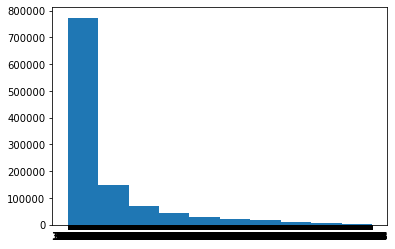

In [84]:
plt.hist(all_items_srgnn);
plt.show()

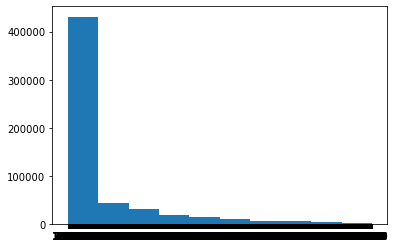

In [85]:
plt.hist(all_items_srgnn_light);
plt.show()

In [9]:
import pickle

In [189]:
data_dir = f'/home/ec2-user/SageMaker/sb-rec-system/algorithms/srgnn_benchmark/data/yoochoose1_64'


train_data = pickle.load(open(data_dir + '/raw/all_train_seq.txt', 'rb'))
lst = list(chain(*train_data))
train_data = pd.DataFrame (lst, columns = ['ItemId'])
train_data['ItemId'] = train_data.ItemId.astype(str)

In [196]:
all_items_srgnn.ItemId[all_items_srgnn.ItemId.isin(train_data.ItemId)].nunique() / train_data.ItemId.nunique()

0.31537753222836096

17376

In [15]:
train = train_data.value_counts().reset_index(name='count')

In [25]:
srgnn_light = all_items_srgnn_light.value_counts().reset_index(name='count')

In [26]:
srgnn = all_items_srgnn.value_counts().reset_index(name='count')

In [61]:
train['ItemId'] = train.ItemId.astype(str)

In [64]:
temp = pd.merge(train, srgnn, on='ItemId', suffixes=('_train', '_srgnn'))

In [68]:
fin = pd.merge(temp, srgnn_light, on='ItemId')

In [71]:
fin.sort_values(by='count_train', ascending=False, inplace=True)

In [86]:
fin["perc_srgnn"] = fin.count_srgnn / fin.count_train

In [87]:
fin["perc_srgnn_light"] = fin["count"] / fin.count_train

In [93]:
dif = fin.perc_srgnn - fin.perc_srgnn_light

In [98]:
range(len(dif))

range(0, 5193)

In [100]:
x = [*range(0,5193, 1)]

<AxesSubplot:>

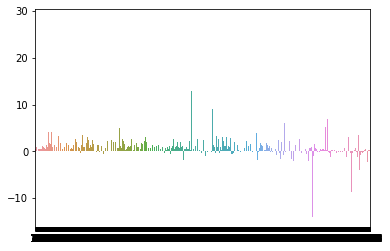

In [101]:
sns.barplot(y=dif, x=x)

In [90]:
sum(fin.perc_srgnn - fin.perc_srgnn_light)

4577.096237407155

In [ ]:
df[cum_percent] = 100 * (df[‘column_name’].cumsum()/df[‘column_name’].sum()) 

In [105]:
tr = train_data.value_counts().reset_index(name='count')

In [106]:
tr['cum_percent'] =  100 * (tr["count"].cumsum()/tr["count"].sum()) 

In [115]:
tr.ItemId.nunique()

17376

<AxesSubplot:>

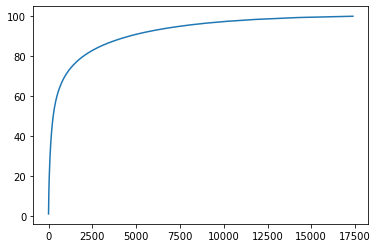

In [197]:
tr.cum_percent.plot()

<AxesSubplot:>

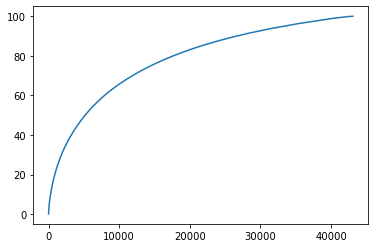

In [198]:
tr_digi.cum_percent.plot()

<AxesSubplot:>

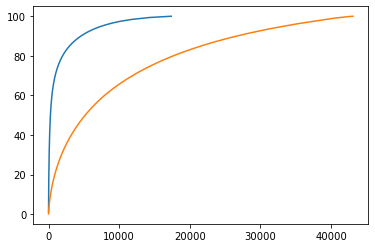

In [205]:
tr.cum_percent.plot()
tr_digi.cum_percent.plot()

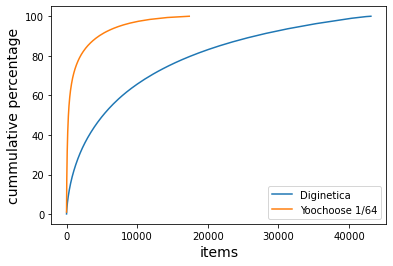

In [209]:
fig,ax = plt.subplots()
ax.plot(tr_digi.cum_percent)
ax.plot(tr.cum_percent)
ax.legend(['Diginetica', 'Yoochoose 1/64'])
ax.set_xlabel("items", fontsize = 14)
ax.set_ylabel("cummulative percentage",
              fontsize=14)
plt.show()

In [211]:
tr_digi.to_csv('diginetica_cummulative.csv',sep=';', index=0)

In [212]:
tr.to_csv('yoochoose_cummulative.csv',sep=';', index=0)

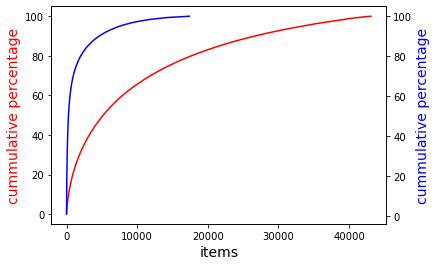

In [204]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(tr_digi.cum_percent,
        color="red")
# set x-axis label
ax.set_xlabel("items", fontsize = 14)
# set y-axis label
ax.set_ylabel("cummulative percentage",
              fontsize=14,color="red")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(tr.cum_percent,color="blue")
ax2.set_ylabel("cummulative percentage",color="blue",fontsize=14)
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

In [116]:
data_dir = f'/home/ec2-user/SageMaker/sb-rec-system/algorithms/srgnn_benchmark/data/diginetica'


train_data = pickle.load(open(data_dir + '/raw/all_train_seq.txt', 'rb'))
lst = list(chain(*train_data))
train_data = pd.DataFrame (lst, columns = ['ItemId'])

In [118]:
tr_digi = train_data.value_counts().reset_index(name='count')

In [120]:
tr_digi['cum_percent'] =  100 * (tr_digi["count"].cumsum()/tr_digi["count"].sum()) 

In [131]:
#postnl
data_dir = '/home/ec2-user/SageMaker/sb-rec-system/data/prepared/srgnn/'


In [172]:
full_path = data_dir + r'item_views_tra_seqs.2.txt'
train_data = pickle.load(open(full_path, 'rb'))
lst = list(chain(*train_data))
pnl_2 = pd.DataFrame (lst, columns = ['ItemId'])

In [173]:
pnl_2 = pnl_2.ItemId.value_counts().reset_index(name='count')

In [174]:
pnl_2['cum_percent'] =  100 * (pnl_2["count"].cumsum()/pnl_2["count"].sum()) 

<AxesSubplot:>

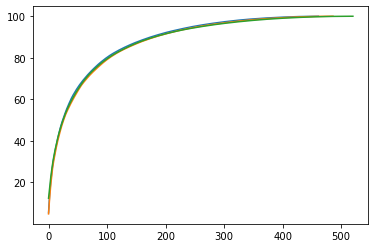

In [177]:
pnl_0.cum_percent.plot()
pnl_1.cum_percent.plot()
pnl_2.cum_percent.plot()